# Week 4 handin

## 01 Assignment
Here is the text for the assignment linked to

## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

# Ex 1 

1.Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

In [4]:
import numpy as np

filename = '../data/befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

print(type(bef_stats_df),' of size: ',bef_stats_df.size)


<class 'numpy.ndarray'>  of size:  2712585


3. Using this data:

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

Find out how many people lived in each of the 11 areas in 2015

In [5]:
dd = bef_stats_df

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

def number_of_people_per_area(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() 
    return sum_of_people


for key in neighb:
    mask = (dd[:,0] == 2015) & (dd[:,1] == key)
    array = np.array([number_of_people_per_area(key, mask)])
    msg = 'Total number of people living in {} in the year 2015 is {} '
    print(msg.format(neighb[key] ,array.max() ))
    


Total number of people living in Indre By in the year 2015 is 51937 
Total number of people living in Østerbro in the year 2015 is 75113 
Total number of people living in Nørrebro in the year 2015 is 78802 
Total number of people living in Vesterbro/Kgs. Enghave in the year 2015 is 61623 
Total number of people living in Valby in the year 2015 is 51727 
Total number of people living in Vanløse in the year 2015 is 39537 
Total number of people living in Brønshøj-Husum in the year 2015 is 43908 
Total number of people living in Bispebjerg in the year 2015 is 53604 
Total number of people living in Amager Øst in the year 2015 is 55205 
Total number of people living in Amager Vest in the year 2015 is 64967 
Total number of people living in Udenfor in the year 2015 is 3872 


4.Make a bar plot to show the size of each city area from the smallest to the largest

In [1]:
import matplotlib.pyplot as plt

area_pop = {}

def fill_dict():
    for key in neighb:
        mask = (dd[:,0] == 2015) & (dd[:,1] == key)
        area_pop.update({neighb[key]:number_of_people_per_area(key, mask) })
    



def make_bar_pop_area():
    dict_sorted = {k: v for k, v in sorted(area_pop.items(), key=lambda item: item[1])}
    for key in dict_sorted:
        plt.bar([key],[dict_sorted[key]],width=0.5, align='center')
        plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
    
    
fill_dict()
make_bar_pop_area()
    


NameError: name 'neighb' is not defined

5.Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [41]:
def get_all_people_over_65():
    total_people_over_65 = 0
    mask = (dd[:,0] == 2015) & (dd[:,1] != 99) & (dd[:,2] > 65 )
    for key in neighb:
        total_people_over_65 += number_of_people_per_area(key, mask)
    print(int(total_people_over_65))
    
get_all_people_over_65()
                              


55700


6.How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"

In [63]:
def get_all_people_over_65():
    total_people_nordic = 0
    mask = ((dd[:,0] == 2015) & (dd[:,1] != 99) & (dd[:,2] > 65 )) & ((dd[:,3] == 5101) | (dd[:,3] == 5110) | (dd[:,3] == 5120) | (dd[:,3] == 5104) | (dd[:,3] == 5106))
    print(np.sum(dd[mask][:,4]))
get_all_people_over_65()

606


7.Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

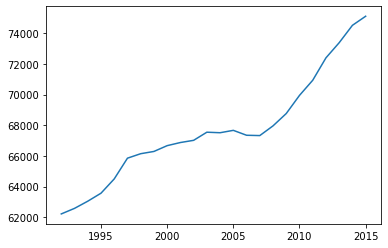

In [75]:
import matplotlib.pyplot as plt

def make_bar_plot_oesterbro():
    oesterbro_people = []
    unique_years = np.unique(dd[:,0])
    for year in unique_years:
        mask = (dd[:,0] == year) & (dd[:,1] == 2 )
        oesterbro_people.append(np.sum(dd[mask][:,4]))
    
    
    plt.plot(unique_years, oesterbro_people)
       
        
        
make_bar_plot_oesterbro()
    